In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [19]:
# --- Load all price files
files = glob.glob("../../data/clean/stock_prices_clean/*.csv")
frames = []
for f in files:
    ticker = f.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(f, parse_dates=["date"])
    df["ticker"] = ticker.split("\\")[-1]
    frames.append(df)


In [21]:
frames[0]

,date,open,high,low,close,volume,adj close,ticker
0,2018-01-03,19.562587,19.749111,19.547665,19.719267,5519259,19.719267,ABBN.SW
1,2018-01-04,19.838642,19.958017,19.749111,19.935635,5738092,19.935635,ABBN.SW
2,2018-01-05,19.920712,20.084852,19.883406,20.084852,4435594,20.084852,ABBN.SW
3,2018-01-08,20.099775,20.137079,19.920713,20.092314,5029780,20.092314,ABBN.SW
4,2018-01-09,19.972938,20.196766,19.935634,20.196766,6974533,20.196766,ABBN.SW
...,...,...,...,...,...,...,...,...
1754,2024-12-19,48.924035,49.120203,47.747033,47.796074,3775494,47.796074,ABBN.SW
1755,2024-12-20,47.080066,48.070707,46.942749,47.923584,7180992,47.923584,ABBN.SW
1756,2024-12-23,47.923584,48.355150,47.786267,48.247257,1367512,48.247257,ABBN.SW
1757,2024-12-27,48.257069,48.669018,48.247259,48.590553,1420844,48.590553,ABBN.SW


In [22]:
frames[1]

,date,open,high,low,close,volume,adj close,ticker
0,2019-04-08,49.291523,49.291523,49.291523,49.291523,0.0,49.291523,ALC.SW
1,2019-04-09,54.220677,57.937258,54.062944,57.227459,27102313.0,57.227459,ALC.SW
2,2019-04-10,57.671084,57.710518,55.324806,56.823269,9612093.0,56.823269,ALC.SW
3,2019-04-11,56.192335,56.428936,54.762880,55.206505,7584156.0,55.206505,ALC.SW
4,2019-04-12,53.234844,54.358690,53.057394,53.234844,9887415.0,53.234844,ALC.SW
...,...,...,...,...,...,...,...,...
1438,2024-12-19,76.033153,76.571258,75.255875,75.495041,893459.0,75.495041,ALC.SW
1439,2024-12-20,74.837347,75.813923,74.498540,75.754128,1977273.0,75.754128,ALC.SW
1440,2024-12-23,75.594689,76.431747,75.116364,76.192589,511745.0,76.192589,ALC.SW
1441,2024-12-27,76.611117,77.029654,76.252376,76.890144,412212.0,76.890144,ALC.SW


In [23]:
market = pd.concat(frames)
market.head()

,date,open,high,low,close,volume,adj close,ticker
0,2018-01-03,19.562587,19.749111,19.547665,19.719267,5519259.0,19.719267,ABBN.SW
1,2018-01-04,19.838642,19.958017,19.749111,19.935635,5738092.0,19.935635,ABBN.SW
2,2018-01-05,19.920712,20.084852,19.883406,20.084852,4435594.0,20.084852,ABBN.SW
3,2018-01-08,20.099775,20.137079,19.920713,20.092314,5029780.0,20.092314,ABBN.SW
4,2018-01-09,19.972938,20.196766,19.935634,20.196766,6974533.0,20.196766,ABBN.SW


In [27]:
market = market.sort_values(["ticker", "date"])


## 1. Sanity-check the market data

In [26]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48936 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       48936 non-null  datetime64[ns]
 1   open       48936 non-null  float64       
 2   high       48936 non-null  float64       
 3   low        48936 non-null  float64       
 4   close      48936 non-null  float64       
 5   volume     48936 non-null  float64       
 6   adj close  48936 non-null  float64       
 7   ticker     48936 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.4+ MB


In [28]:
market.head()

,date,open,high,low,close,volume,adj close,ticker
0,2018-01-03,19.562587,19.749111,19.547665,19.719267,5519259.0,19.719267,ABBN.SW
1,2018-01-04,19.838642,19.958017,19.749111,19.935635,5738092.0,19.935635,ABBN.SW
2,2018-01-05,19.920712,20.084852,19.883406,20.084852,4435594.0,20.084852,ABBN.SW
3,2018-01-08,20.099775,20.137079,19.920713,20.092314,5029780.0,20.092314,ABBN.SW
4,2018-01-09,19.972938,20.196766,19.935634,20.196766,6974533.0,20.196766,ABBN.SW


In [29]:
# basic QC
n_rows = len(market)
n_nulls = market.isna().sum()
dups = market.duplicated(subset=['ticker','date']).sum()
print(f"rows={n_rows}, duplicates={dups}\n", n_nulls)

rows=48936, duplicates=0
 date         0
open         0
high         0
low          0
close        0
volume       0
adj close    0
ticker       0
dtype: int64


## 2. Create returns (our core stationary target)

In [40]:
# make sure types and order are correct
market['date'] = pd.to_datetime(market['date'])
market = market.sort_values(['ticker','date']).reset_index(drop=True)
market['close'] = market['close'].astype(float)

# % returns (aligned by index)
market['return'] = market.groupby('ticker')['close'].pct_change()



In [41]:
market['log_return'] = (
    market.groupby('ticker')['close']
          .transform(lambda s: np.log(s).diff())
)

In [42]:
market.head()

,date,open,high,low,close,volume,adj close,ticker,return,log_return
0,2018-01-03,19.562587,19.749111,19.547665,19.719267,5519259.0,19.719267,ABBN.SW,NaN,NaN
1,2018-01-04,19.838642,19.958017,19.749111,19.935635,5738092.0,19.935635,ABBN.SW,0.010972,0.010913
2,2018-01-05,19.920712,20.084852,19.883406,20.084852,4435594.0,20.084852,ABBN.SW,0.007485,0.007457
3,2018-01-08,20.099775,20.137079,19.920713,20.092314,5029780.0,20.092314,ABBN.SW,0.000372,0.000371
4,2018-01-09,19.972938,20.196766,19.935634,20.196766,6974533.0,20.196766,ABBN.SW,0.005199,0.005185


In [43]:
market.tail()

,date,open,high,low,close,volume,adj close,ticker,return,log_return
48931,2024-12-19,513.891927,513.891927,506.862698,511.232239,373666.0,511.232239,ZURN.SW,-0.017525,-0.017680
48932,2024-12-20,504.203010,506.672766,498.883635,506.292786,975263.0,506.292786,ZURN.SW,-0.009662,-0.009709
48933,2024-12-23,505.342878,512.562039,505.342878,511.992126,214441.0,511.992126,ZURN.SW,0.011257,0.011194
48934,2024-12-27,511.802170,512.562073,506.482794,512.562073,153590.0,512.562073,ZURN.SW,0.001113,0.001113
48935,2024-12-30,510.852262,513.132027,509.712379,511.802155,190986.0,511.802155,ZURN.SW,-0.001483,-0.001484


In [45]:
# quick sanity
market[['ticker','date','close','return','log_return']].head(10)
market.groupby('ticker')[['return','log_return']].agg(['mean','std'])

return           log_return          
             mean       std       mean       std
ticker                                          
ABBN.SW  0.000627  0.015421   0.000508  0.015478
ALC.SW   0.000456  0.017417   0.000306  0.017272
ARYN.SW -0.000378  0.033312  -0.000941  0.033684
BAER.SW  0.000329  0.019553   0.000138  0.019541
BALN.SW  0.000307  0.013186   0.000220  0.013205
BKW.SW   0.000751  0.014933   0.000640  0.014861
BLKB.SW  0.000141  0.004477   0.000131  0.004478
CFR.SW   0.000535  0.020075   0.000334  0.020065
EMMN.SW  0.000181  0.013629   0.000088  0.013600
GIVN.SW  0.000484  0.013251   0.000396  0.013275
HELN.SW  0.000474  0.015115   0.000359  0.015221
HOLN.SW  0.000535  0.015311   0.000417  0.015365
LAND.SW  0.000153  0.018918  -0.000027  0.019012
LOGN.SW  0.000743  0.020999   0.000521  0.021101
LONN.SW  0.000600  0.018939   0.000419  0.019061
NESN.SW  0.000099  0.010210   0.000046  0.010236
NOVN.SW  0.000364  0.011576   0.000297  0.011590
REHN.SW  0.000199  0.016396   0.000065  0.016383
ROG.SW   0.000219  0.012341   0.000143  0.012352
SANN.SW -0.000616  0.054493  -0.001865  0.048440
SCMN.SW  0.000204  0.010237   0.000152  0.010250
SLHN.SW  0.000685  0.014564   0.000579  0.014644
SQN.SW   0.001615  0.025235   0.001297  0.025170
SREN.SW  0.000587  0.015522   0.000466  0.015583
UBSG.SW  0.000562  0.018602   0.000389  0.018642
UHR.SW  -0.000236  0.018758  -0.000412  0.018777
VONN.SW  0.000331  0.017141   0.000184  0.017214
ZURN.SW  0.000645  0.012799   0.000563  0.012850

In [47]:
rolling_vol = subset["return"].rolling(30).std()


In [49]:
ticker = "UBSG.SW"
subset = market[market["ticker"] == ticker].copy()
subset[['date', 'close', 'return']].tail(10)
subset['return'].isna().mean()


np.float64(0.0005685048322910744)

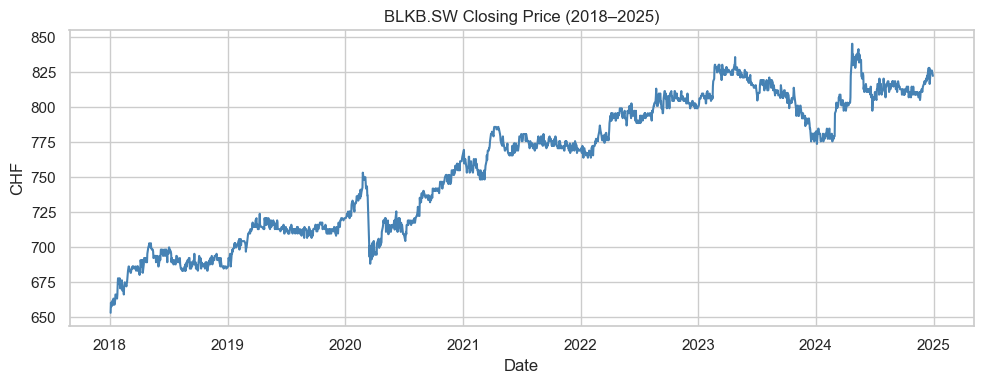

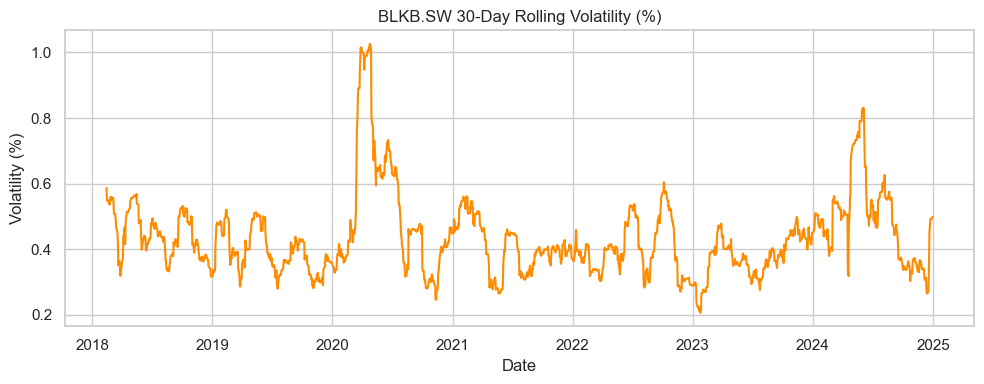

In [63]:
ticker = "BLKB.SW"   # choose any ticker to explore
subset = market[market["ticker"] == ticker].set_index("date")

# --- 1. Price plot
plt.plot(subset.index, subset["close"], color="steelblue")
plt.title(f"{ticker} Closing Price (2018–2025)")
plt.xlabel("Date"); plt.ylabel("CHF")
plt.tight_layout(); plt.show()

# --- 2. Rolling volatility (30-day)
rolling_vol = subset["return"].rolling(30).std() * 100  # multiply by 100 for %
plt.plot(rolling_vol.index, rolling_vol.values, color="darkorange")
plt.title(f"{ticker} 30-Day Rolling Volatility (%)")
plt.xlabel("Date"); plt.ylabel("Volatility (%)")
plt.tight_layout(); plt.show()


In [51]:
# ensure date and returns exist
market['date'] = pd.to_datetime(market['date'])
market = market.sort_values(['ticker', 'date']).reset_index(drop=True)
market['return'] = market.groupby('ticker')['close'].pct_change()

# compute 30-day rolling volatility per ticker
market['volatility_30d'] = (
    market.groupby('ticker')['return']
          .transform(lambda x: x.rolling(window=30).std() * 100)
)

In [57]:
market.head(32)

,date,open,high,low,close,volume,adj close,ticker,return,log_return,volatility_30d
0,2018-01-03,19.562587,19.749111,19.547665,19.719267,5519259.0,19.719267,ABBN.SW,NaN,NaN,NaN
1,2018-01-04,19.838642,19.958017,19.749111,19.935635,5738092.0,19.935635,ABBN.SW,0.010972,0.010913,NaN
2,2018-01-05,19.920712,20.084852,19.883406,20.084852,4435594.0,20.084852,ABBN.SW,0.007485,0.007457,NaN
3,2018-01-08,20.099775,20.137079,19.920713,20.092314,5029780.0,20.092314,ABBN.SW,0.000372,0.000371,NaN
4,2018-01-09,19.972938,20.196766,19.935634,20.196766,6974533.0,20.196766,ABBN.SW,0.005199,0.005185,NaN
5,2018-01-10,20.144539,20.159461,19.995321,20.055008,4184285.0,20.055008,ABBN.SW,-0.007019,-0.007044,NaN
6,2018-01-11,20.122156,20.152000,19.965477,20.077391,4243023.0,20.077391,ABBN.SW,0.001116,0.001115,NaN
7,2018-01-12,20.137079,20.278837,20.107235,20.241533,4182604.0,20.241533,ABBN.SW,0.008175,0.008142,NaN
8,2018-01-15,20.256457,20.256457,20.069934,20.099777,3545666.0,20.099777,ABBN.SW,-0.007003,-0.007028,NaN
9,2018-01-16,20.144541,20.323604,20.137080,20.219151,4641653.0,20.219151,ABBN.SW,0.005939,0.005921,NaN


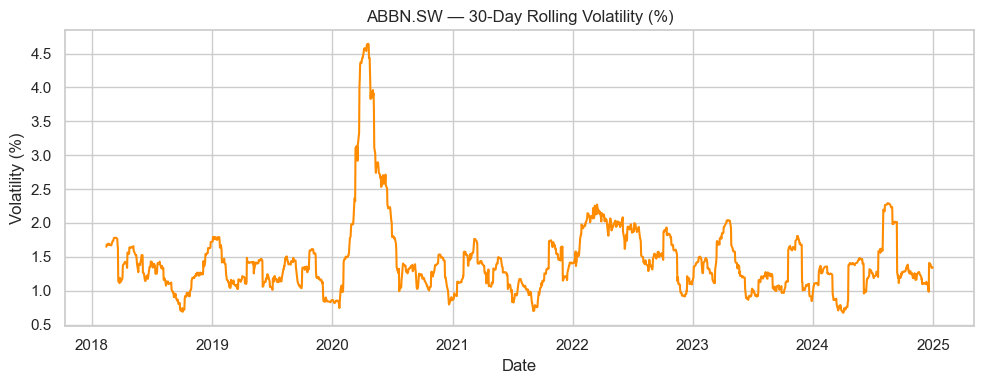

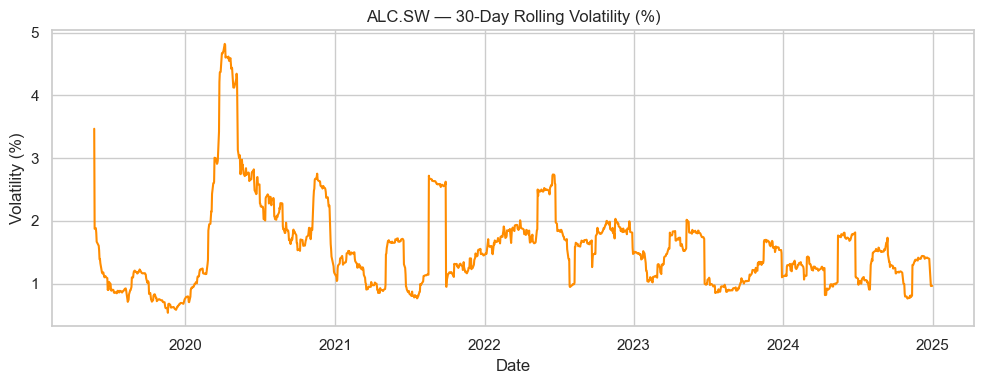

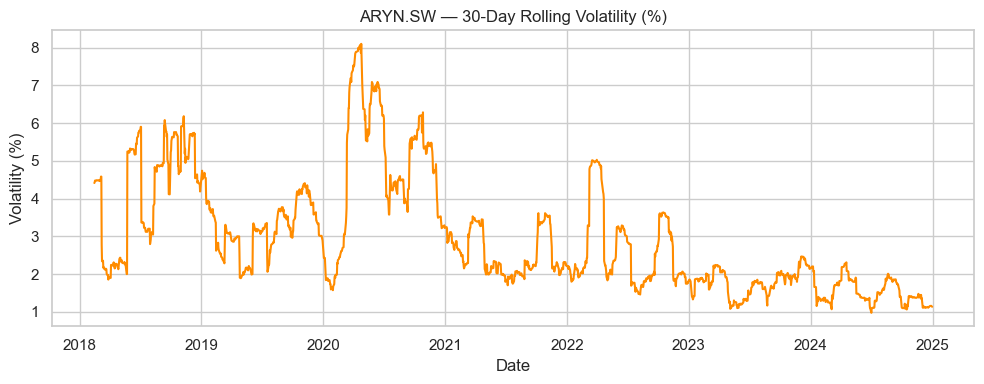

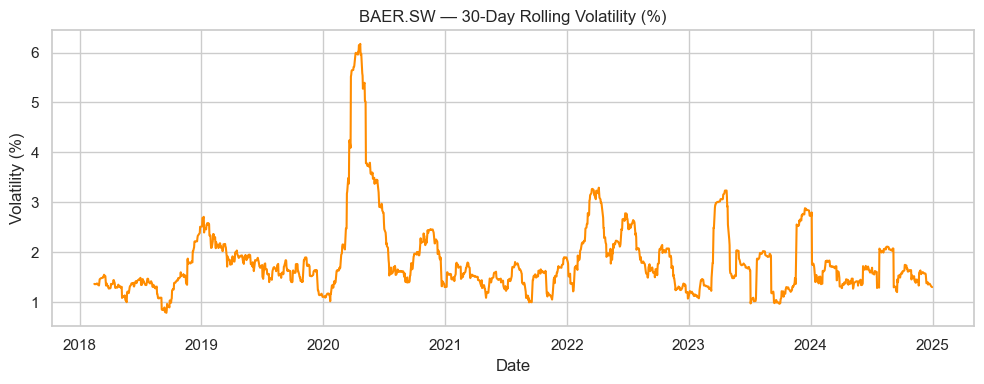

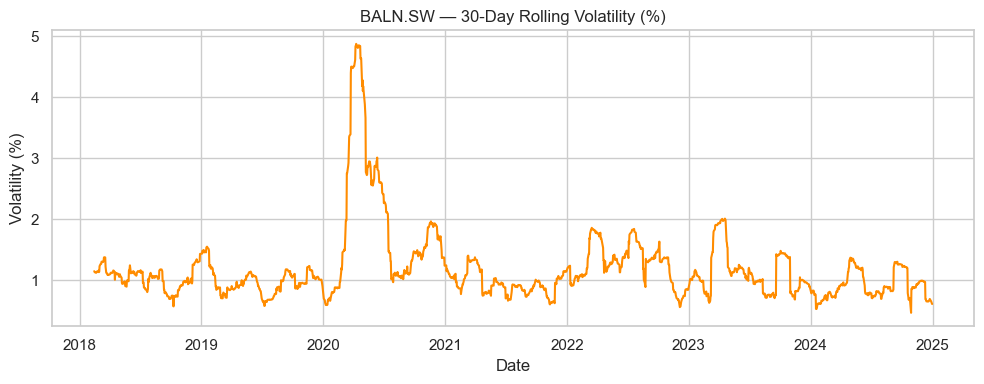

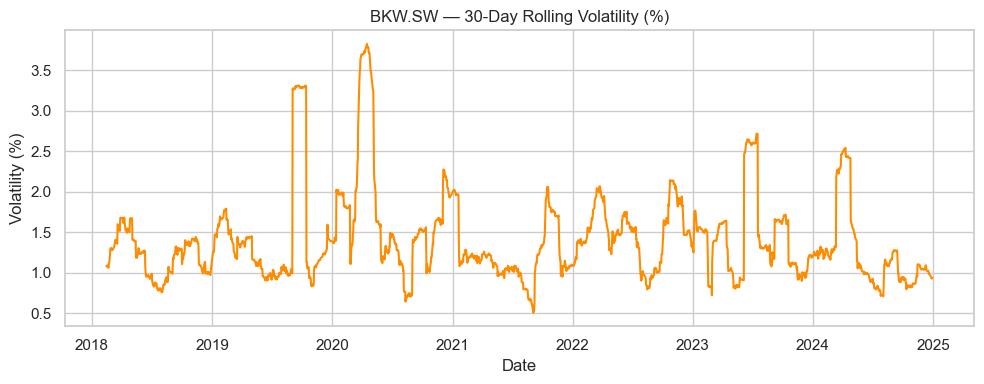

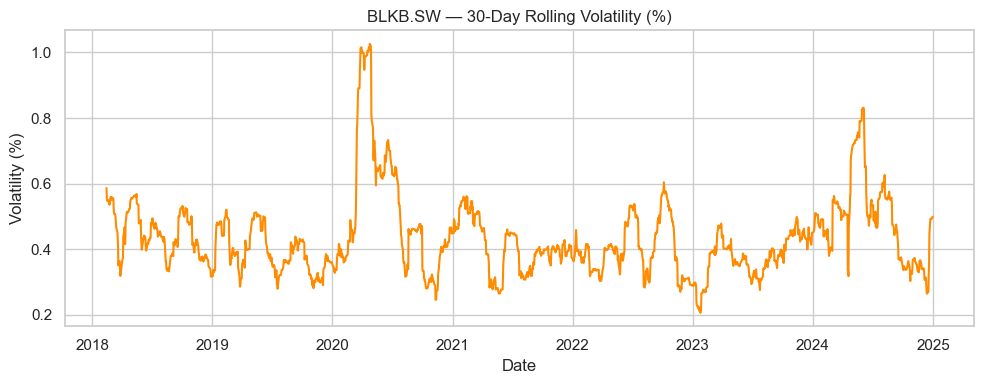

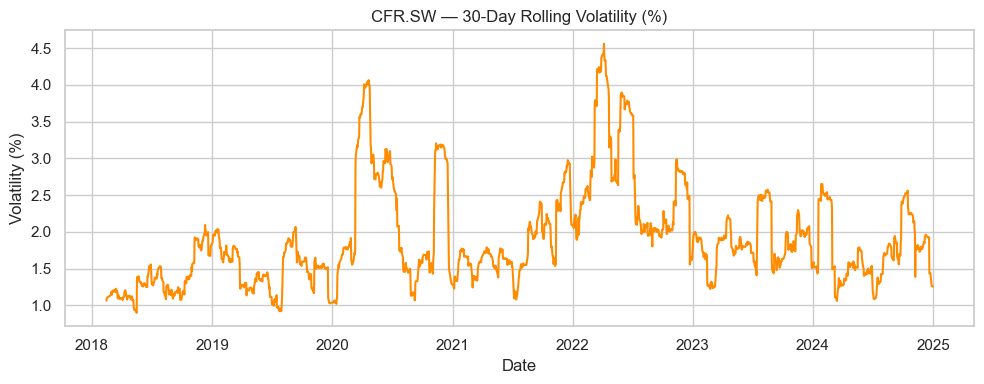

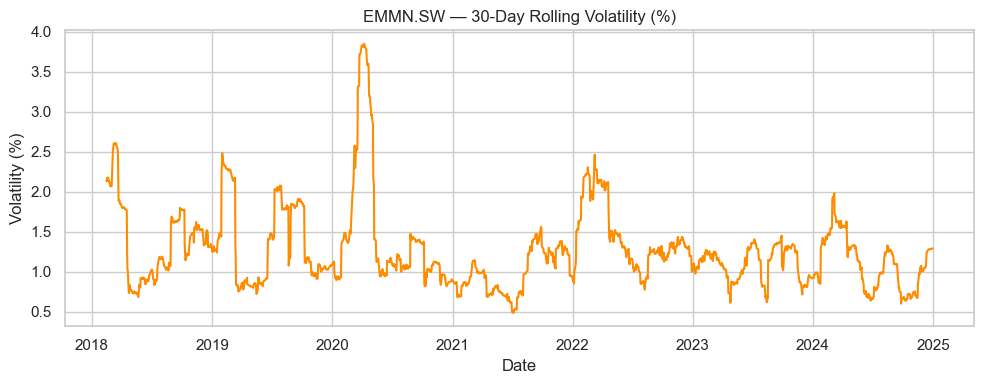

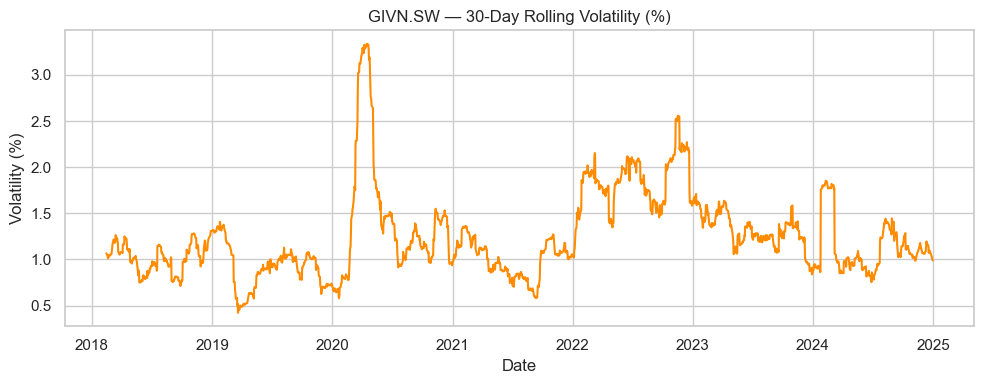

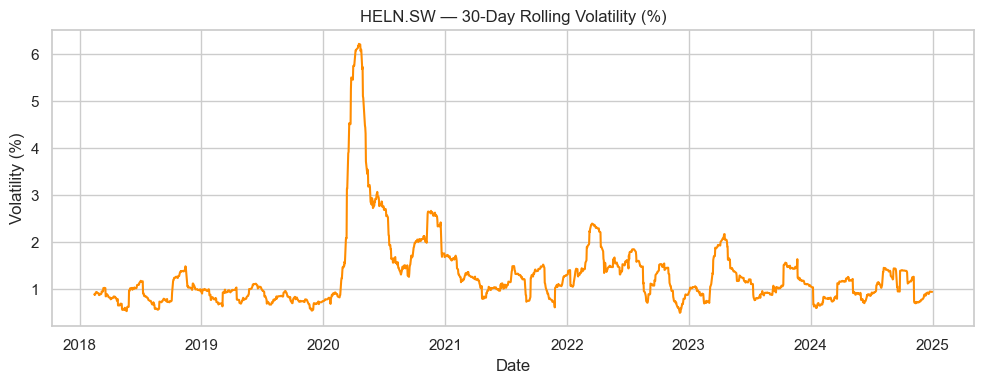

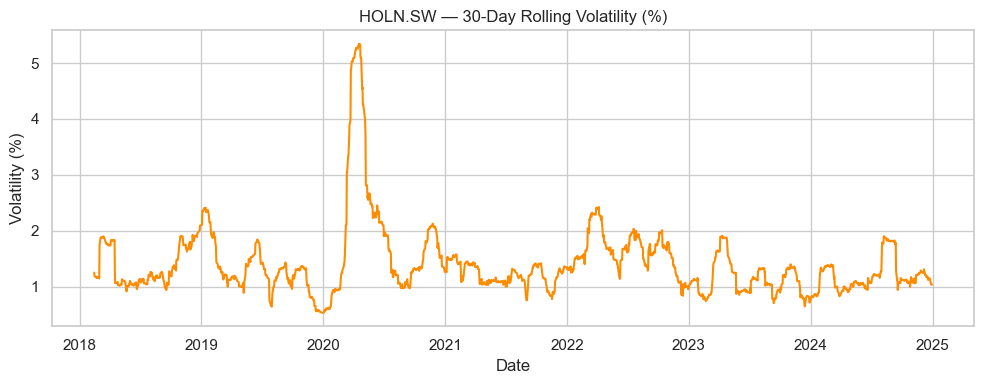

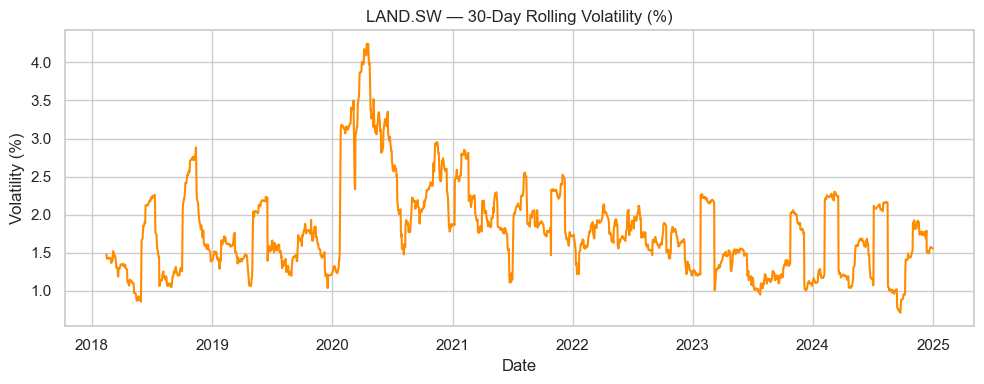

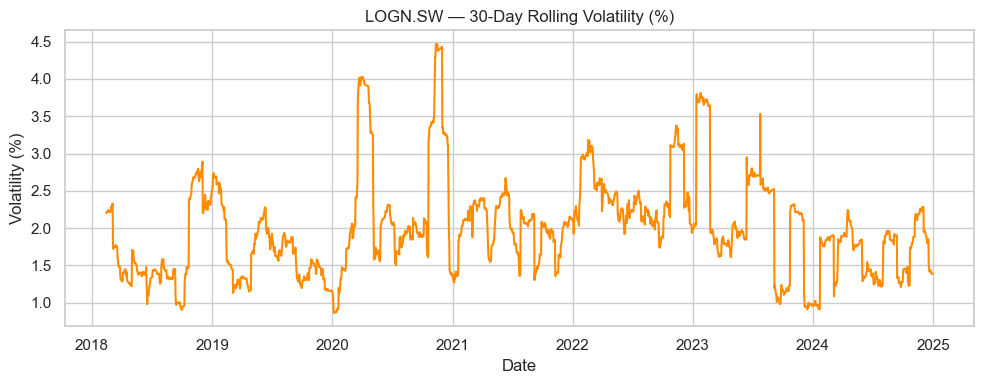

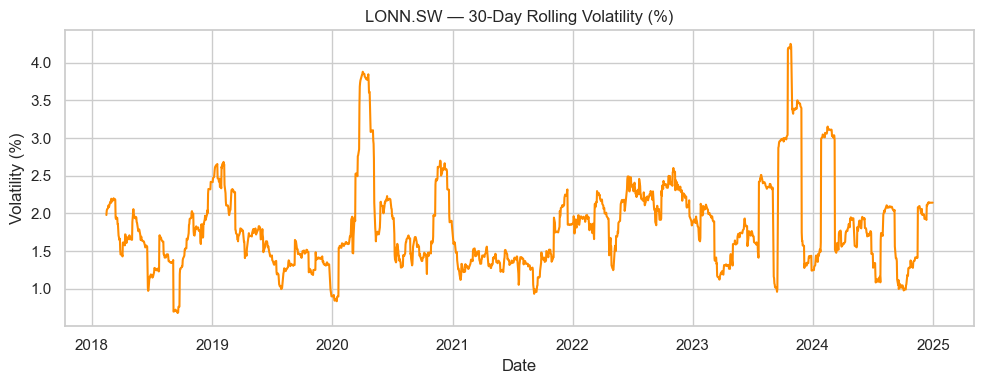

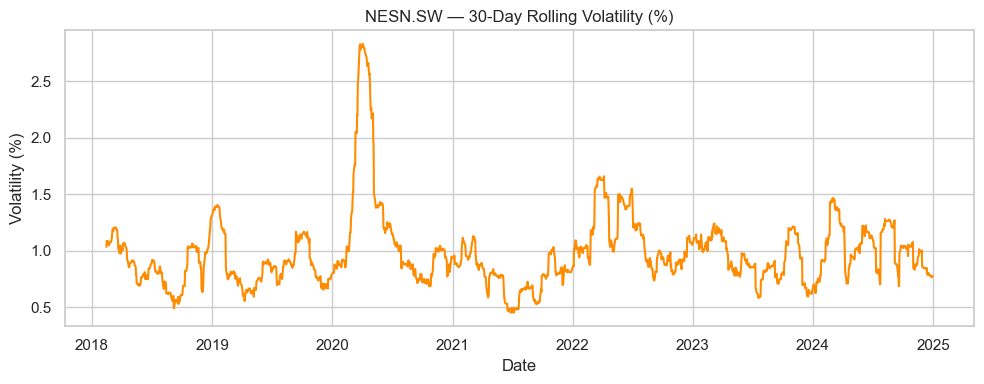

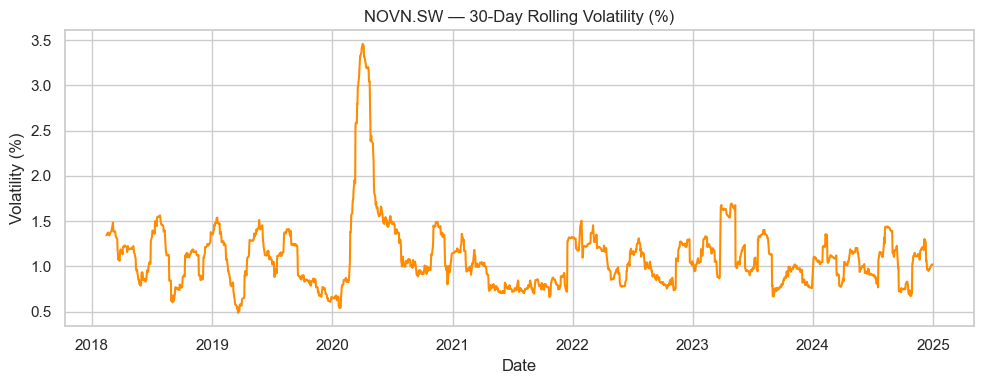

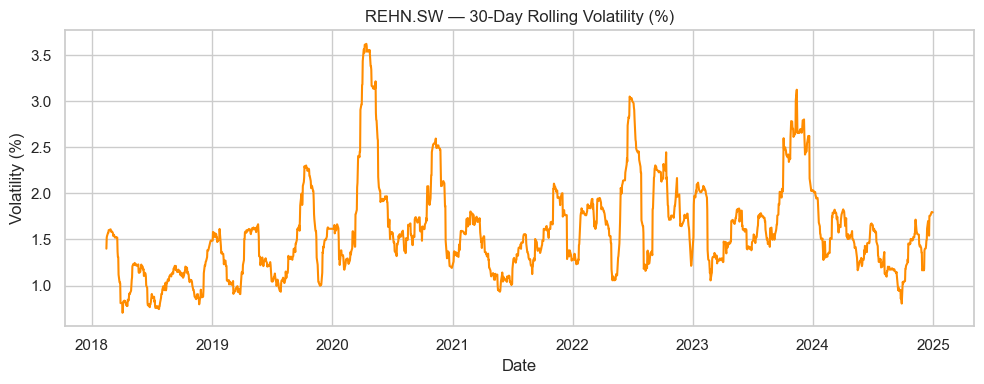

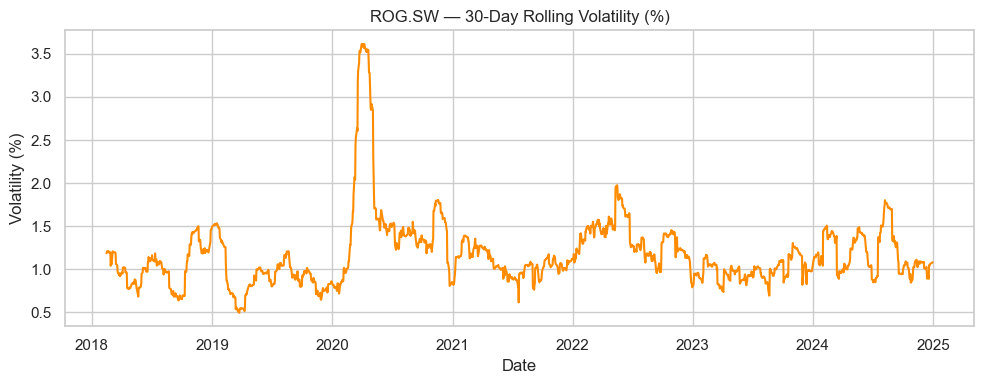

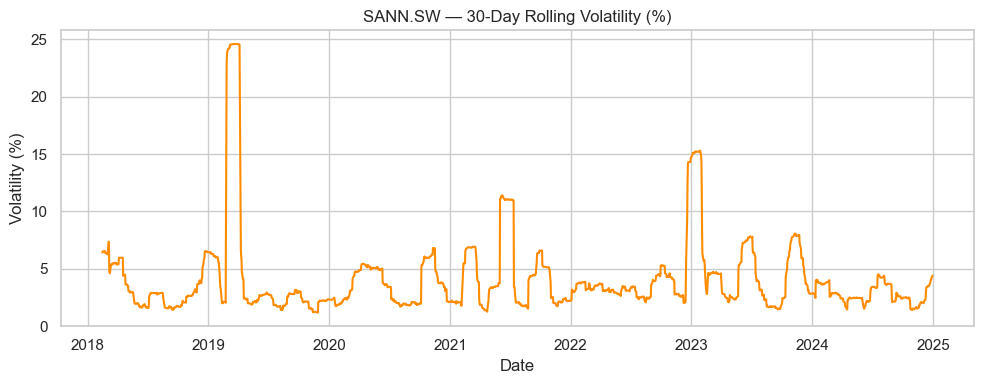

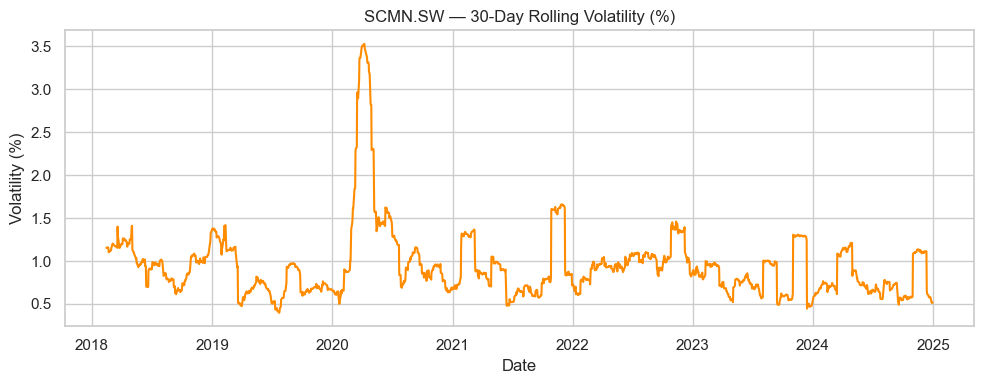

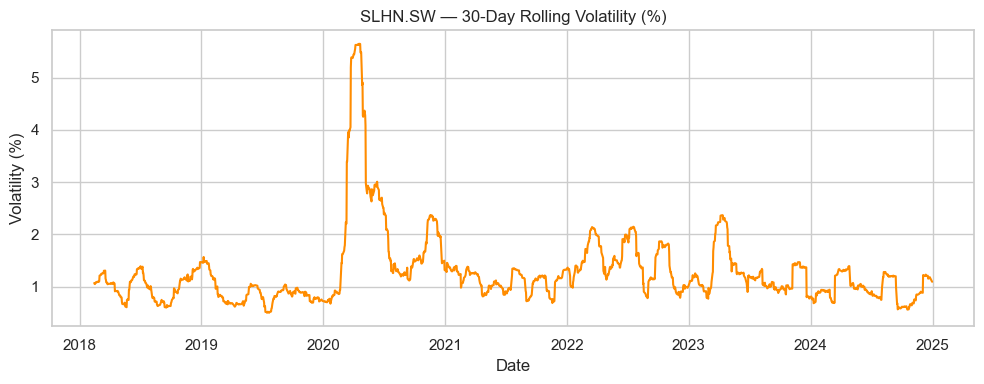

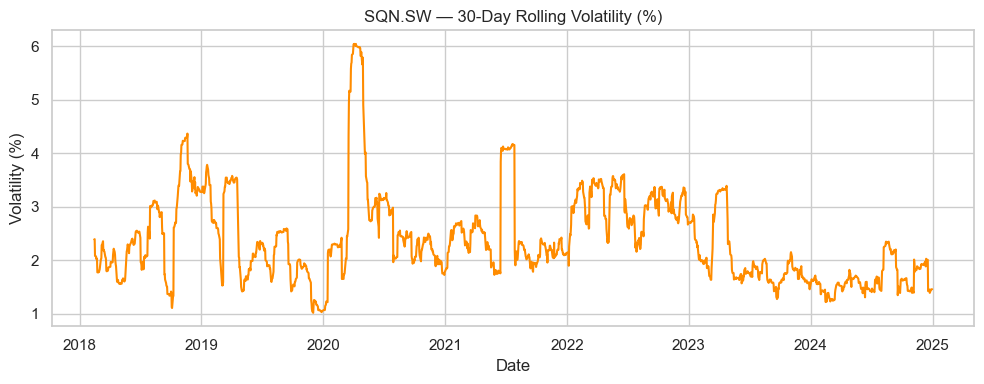

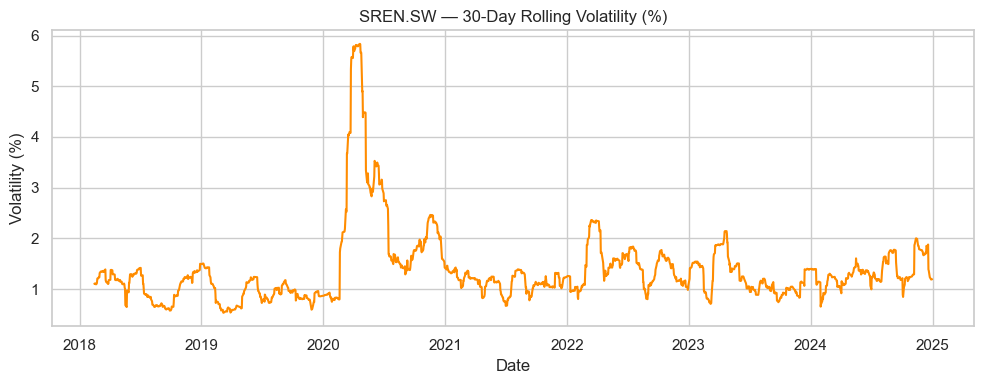

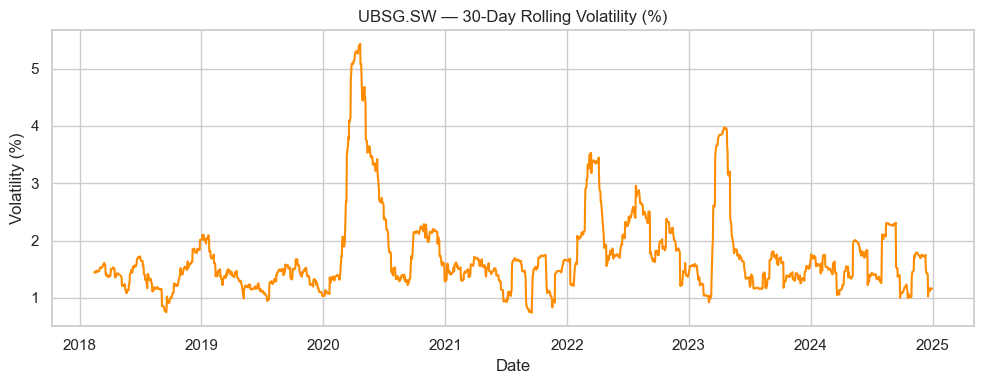

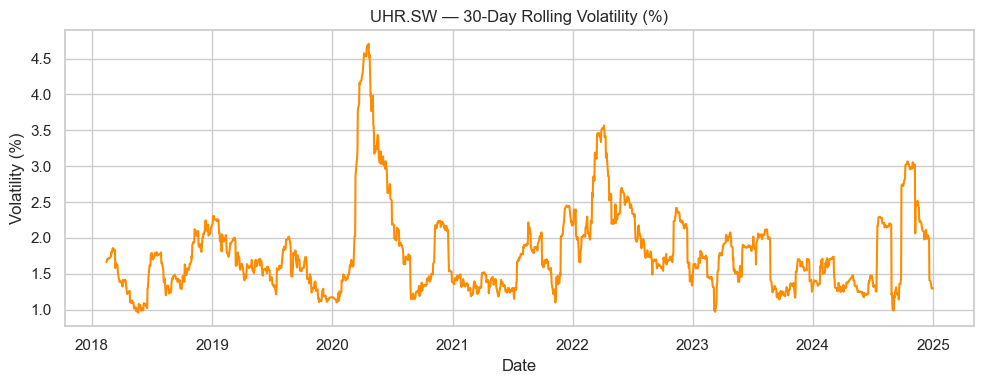

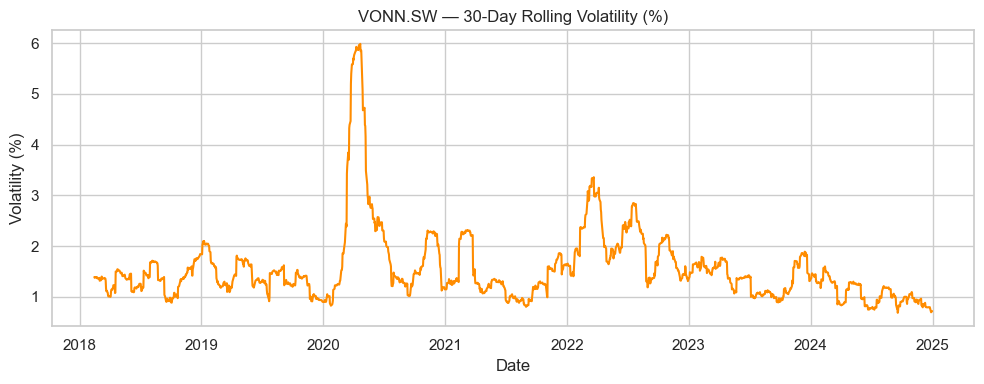

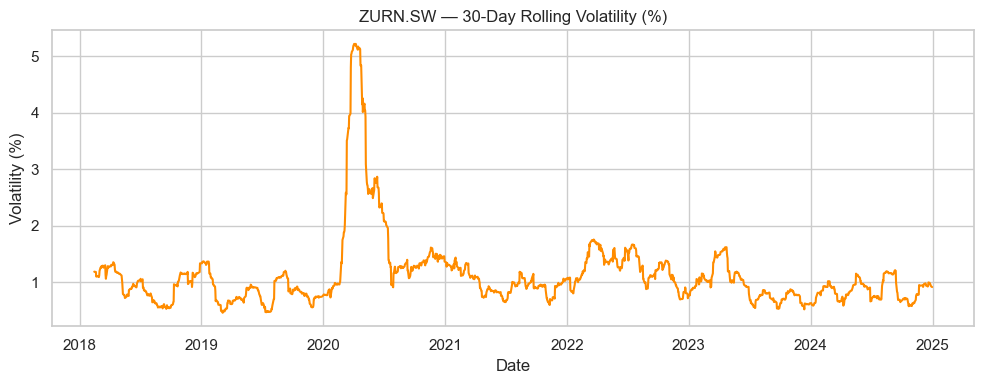

In [61]:
# loop over tickers and plot separately
tickers = sorted(market['ticker'].unique())

for t in tickers:
    df_t = market[market['ticker'] == t].dropna(subset=['volatility_30d'])
    
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_t, x='date', y='volatility_30d', color='darkorange')
    plt.title(f"{t} — 30-Day Rolling Volatility (%)")
    plt.xlabel("Date")
    plt.ylabel("Volatility (%)")
    plt.tight_layout()
    
    # save file
    filename = f"../../figures/market_exploration/volatility_{t.replace('.','_')}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()

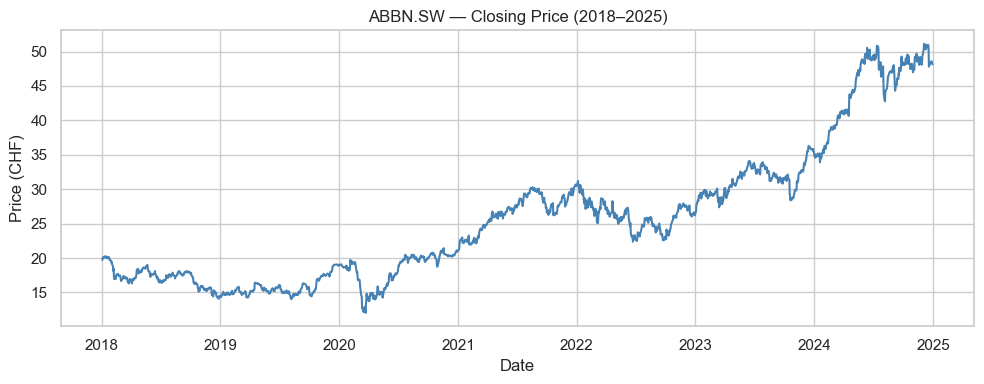

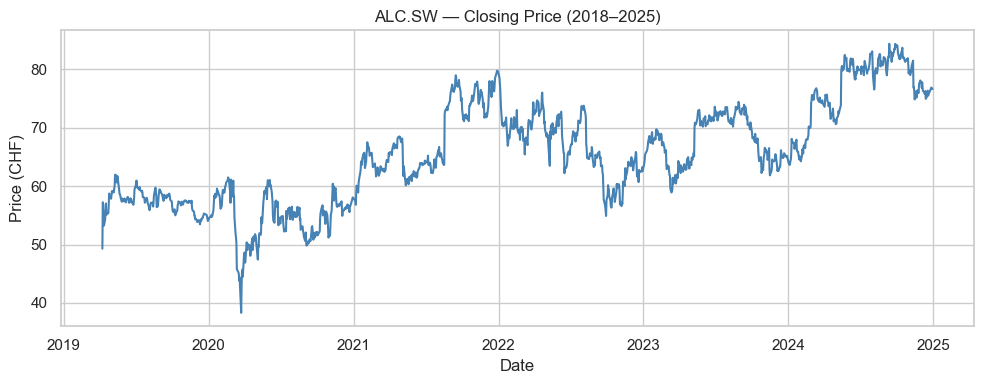

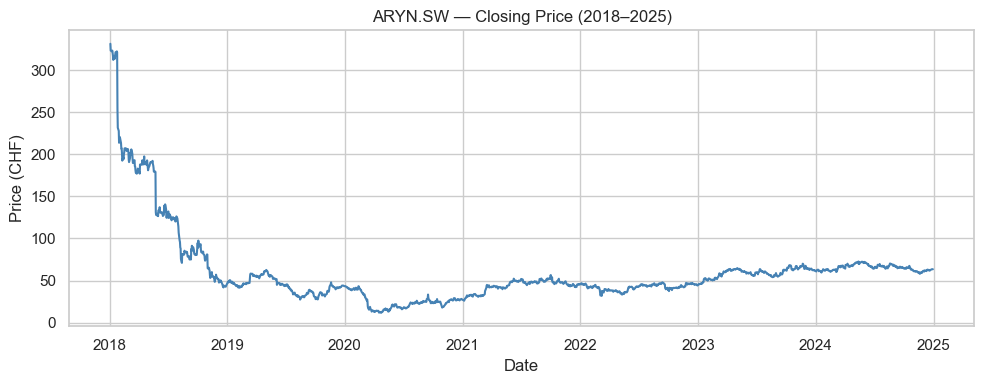

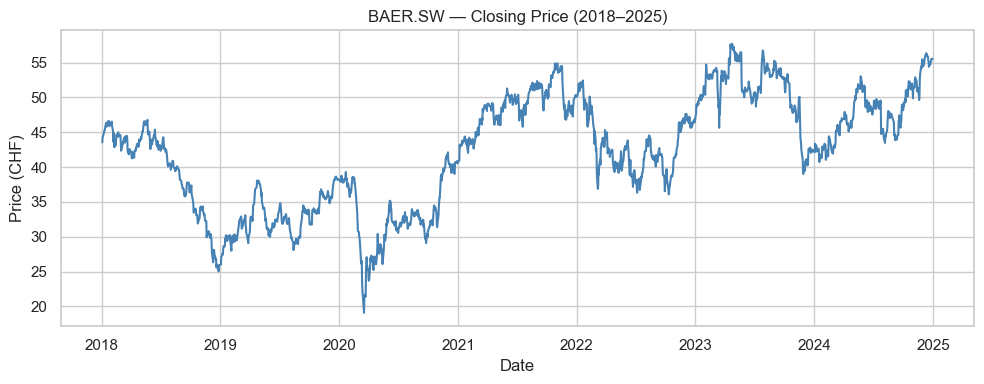

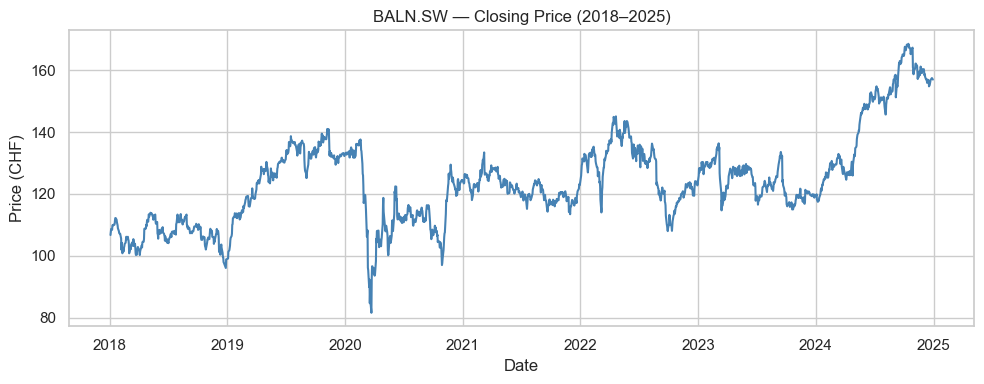

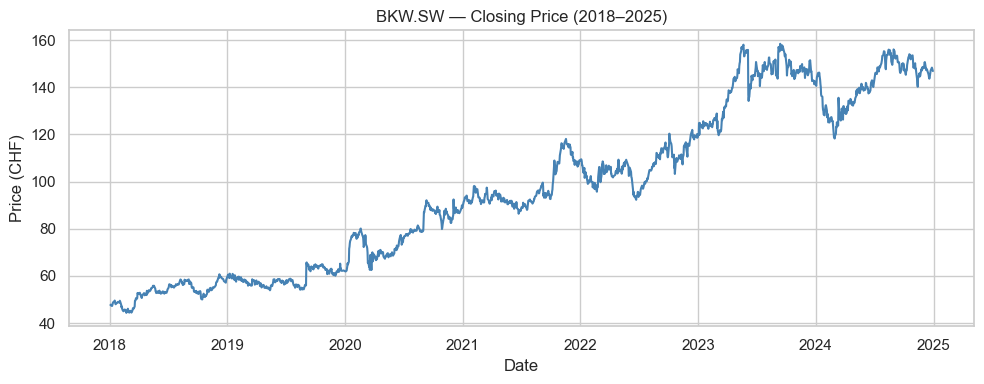

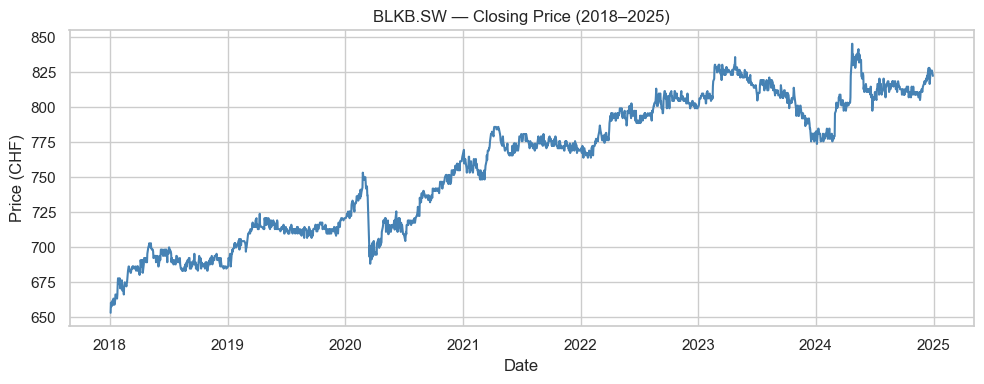

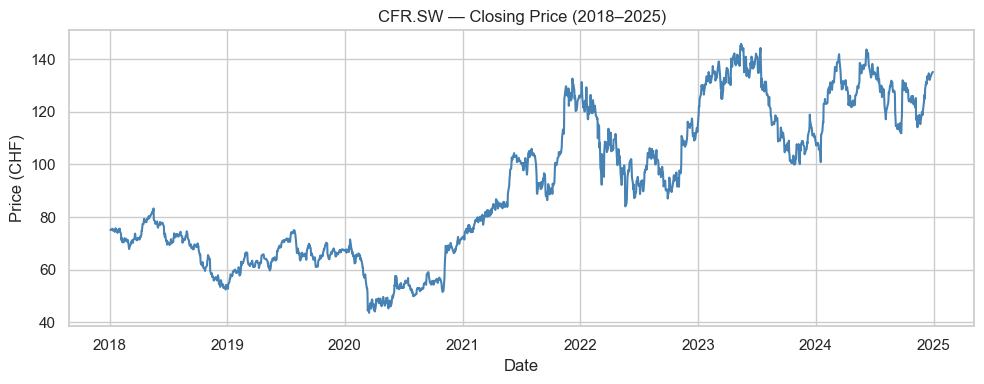

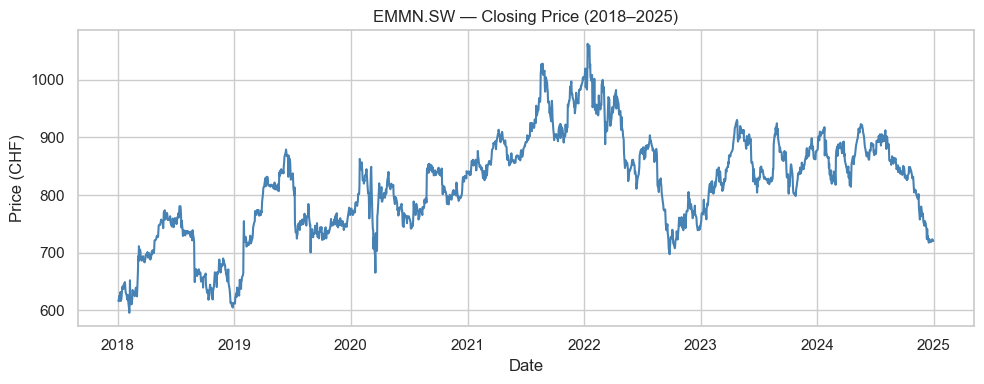

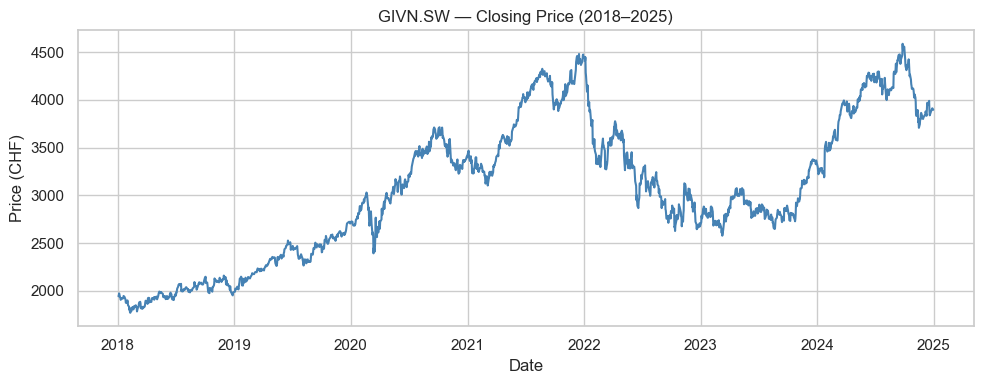

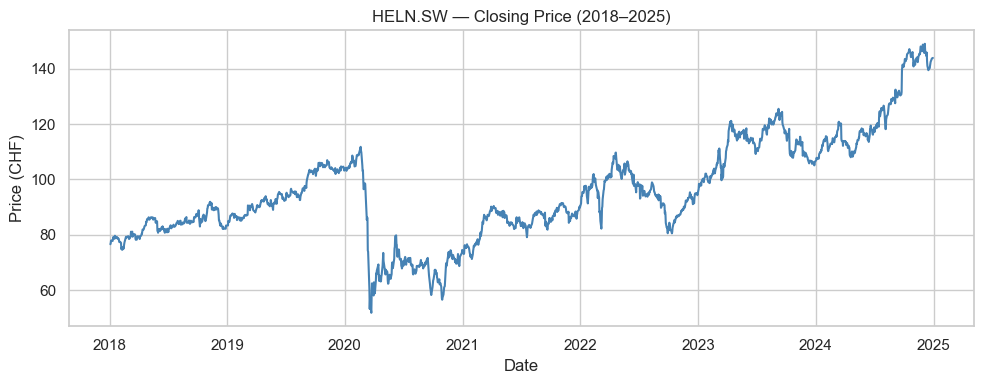

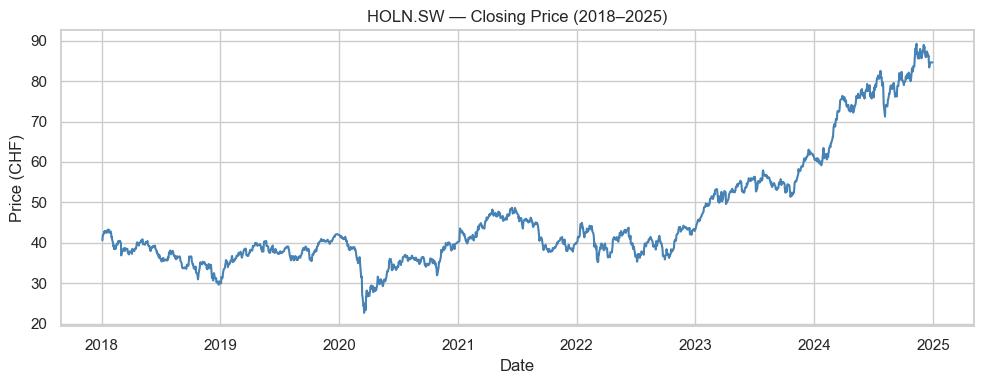

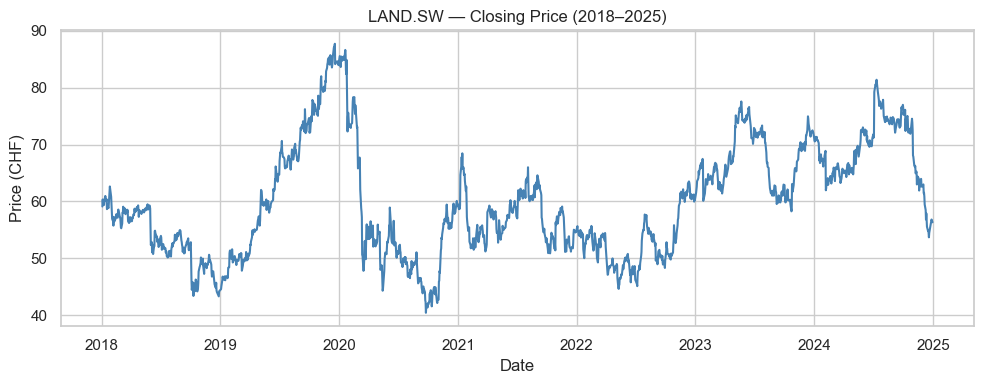

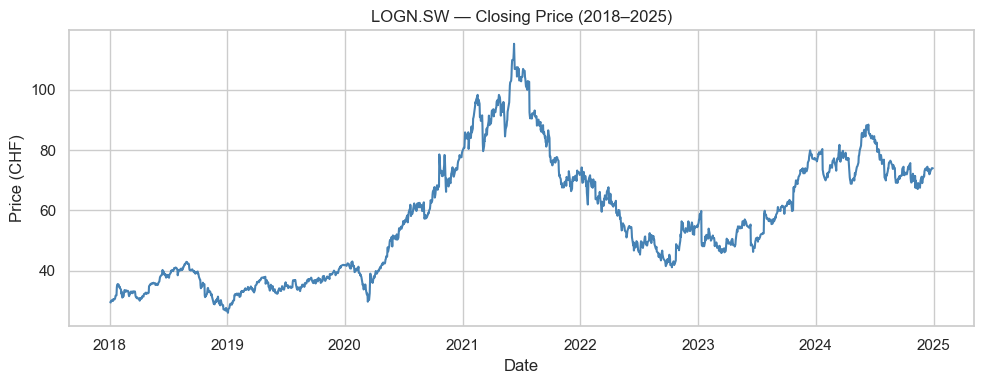

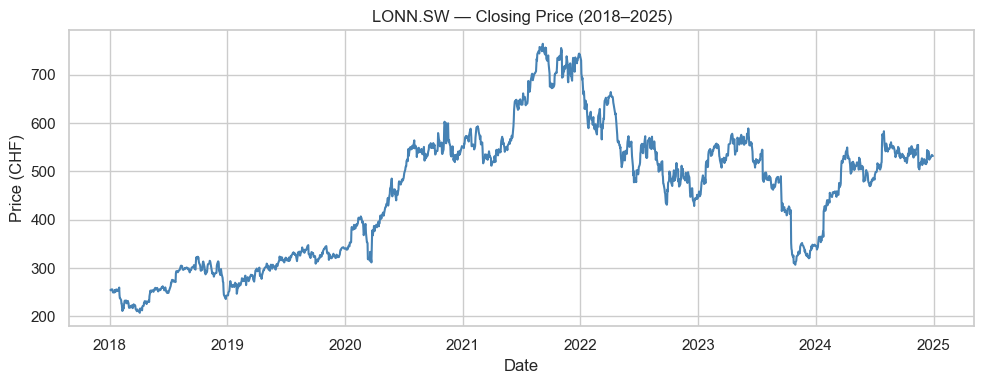

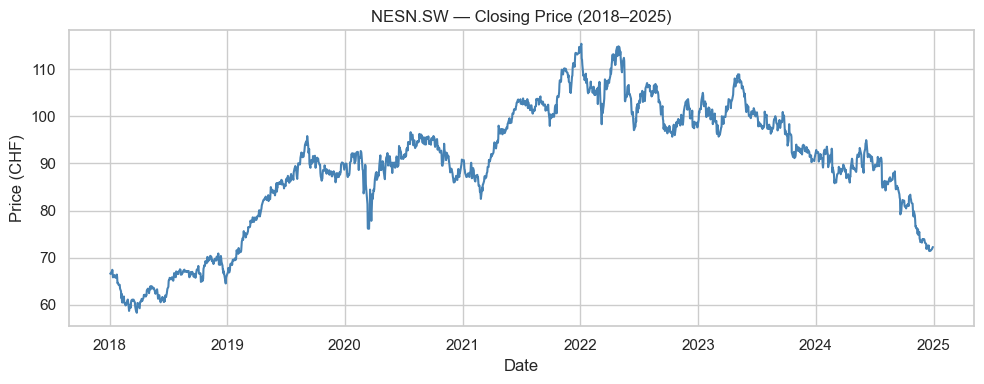

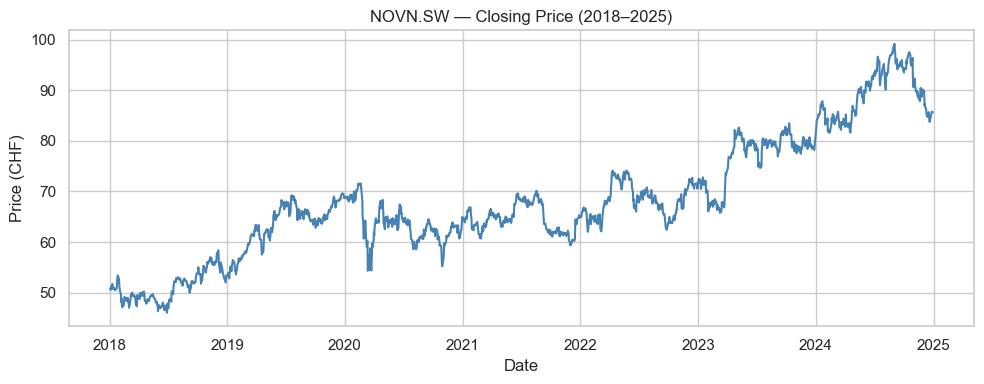

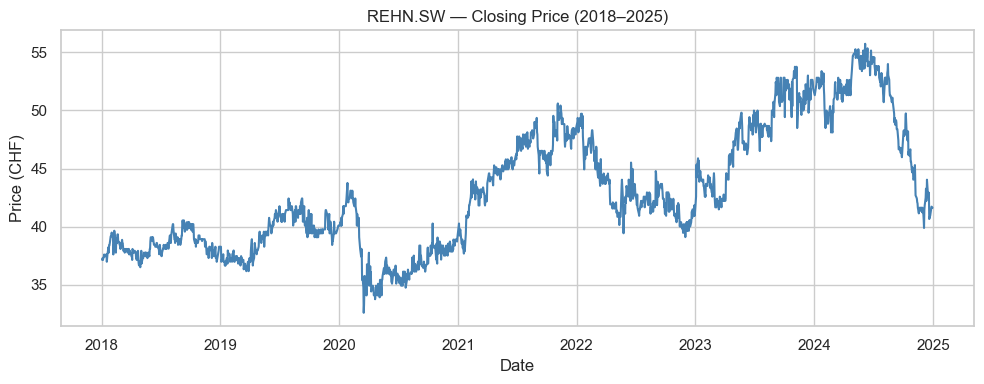

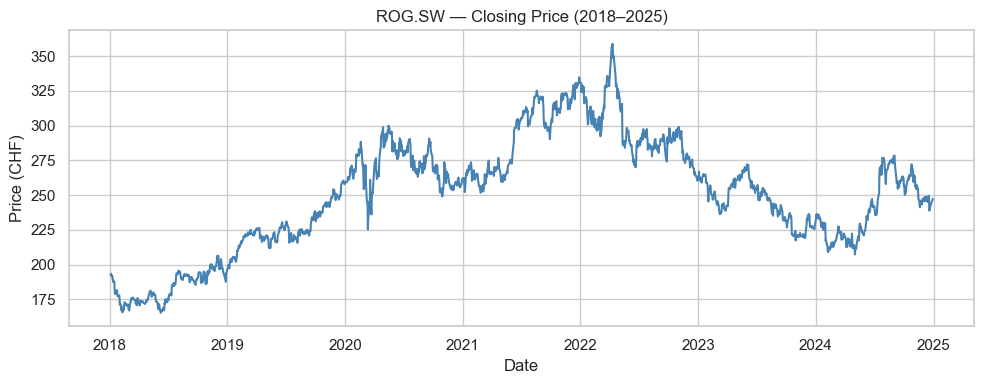

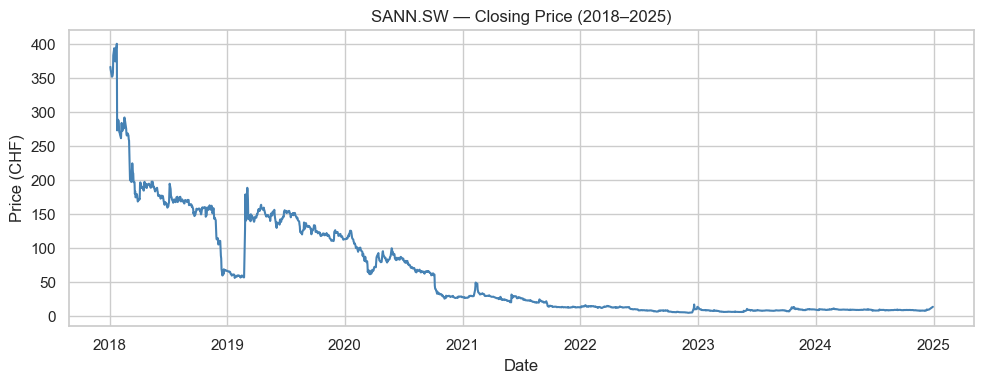

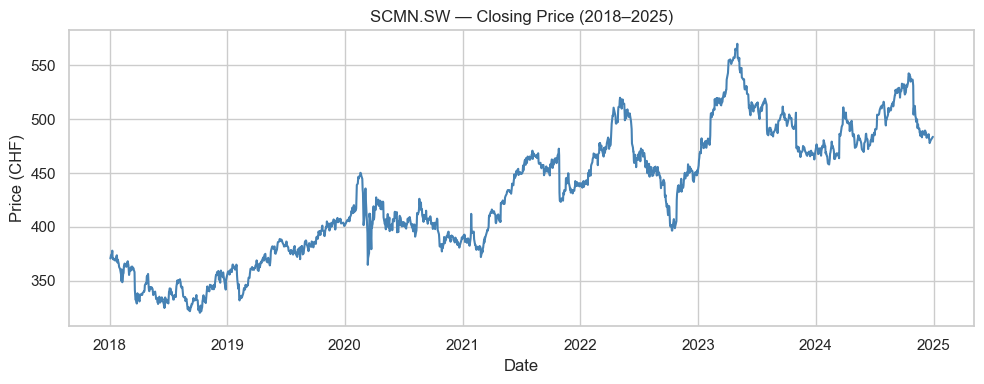

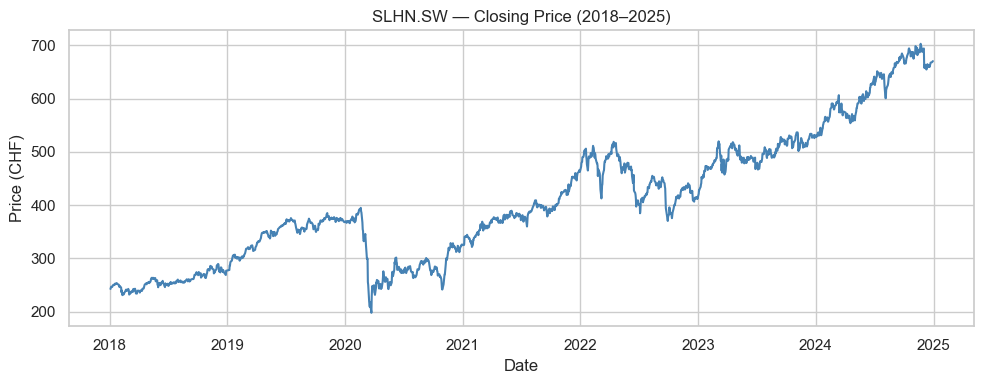

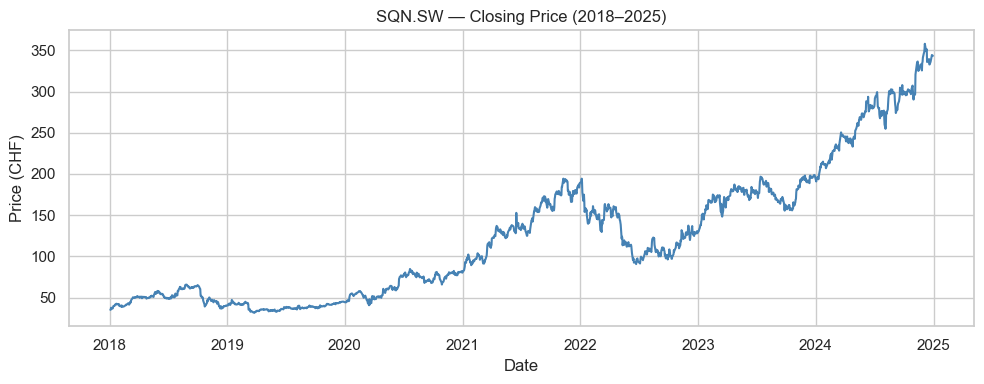

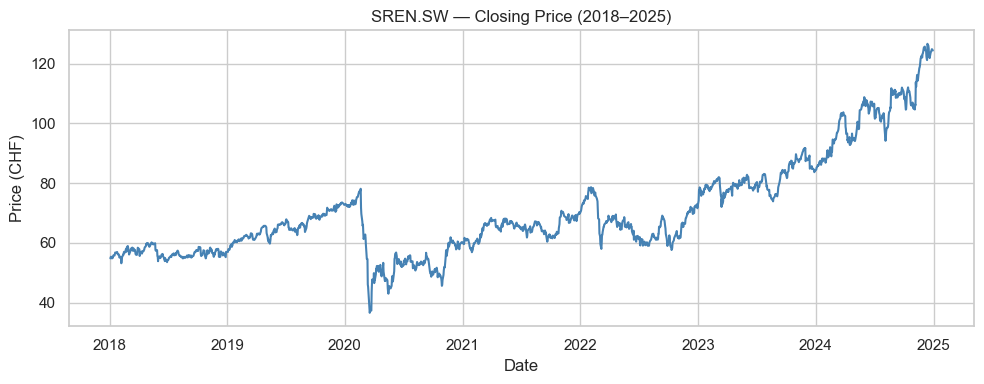

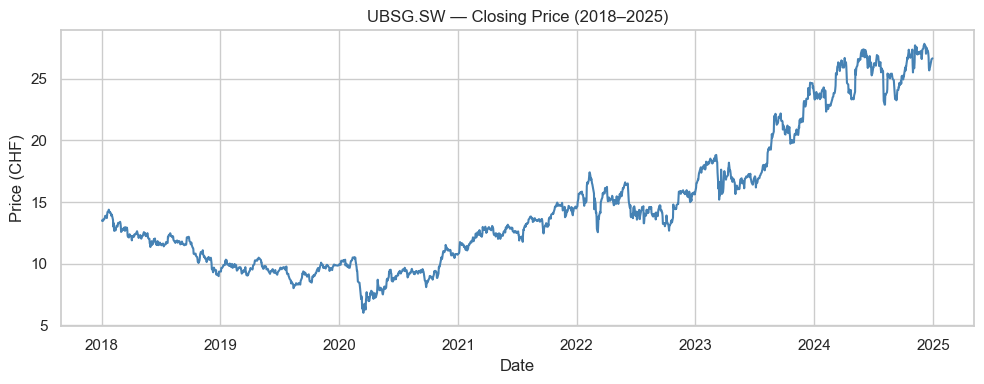

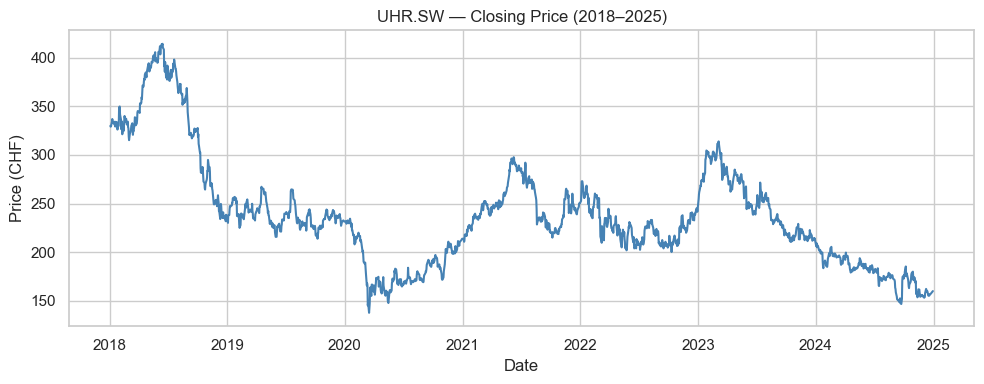

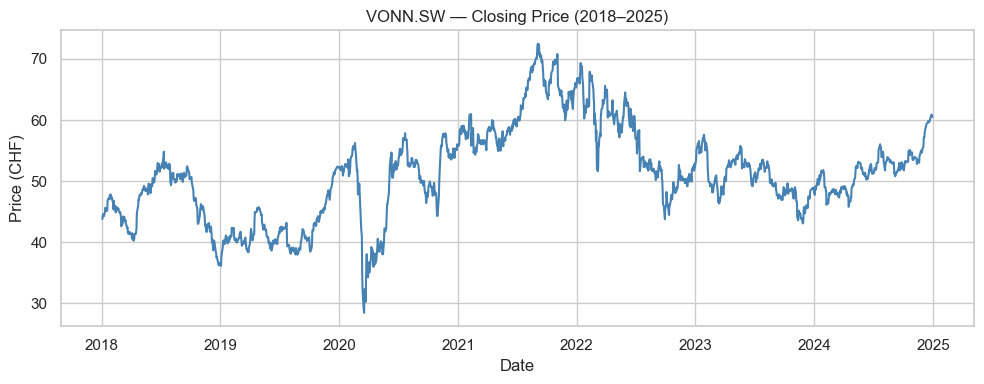

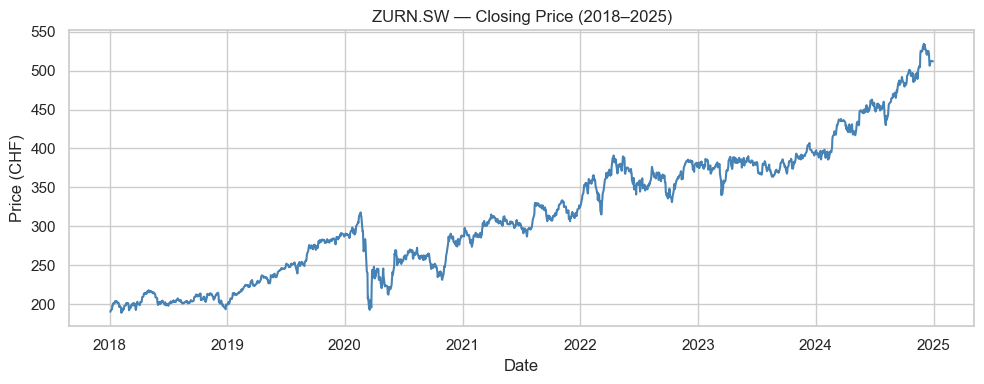

In [62]:
for t in tickers:
    df_t = market[market['ticker'] == t].dropna(subset=['close'])
    
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_t, x='date', y='close', color='steelblue')
    plt.title(f"{t} — Closing Price (2018–2025)")
    plt.xlabel("Date")
    plt.ylabel("Price (CHF)")
    plt.tight_layout()
    
    # Ensure filename uses underscore consistently
    filename = f"../../figures/market_exploration/closing_price_{t.replace('.', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()  # show the figure
    plt.close()



In [65]:
market.groupby("ticker")["close"].agg(["min","max"]).sort_values("max", ascending=False)


,min,max
ticker,,
GIVN.SW,1769.015137,4586.458008
EMMN.SW,595.867188,1062.348145
BLKB.SW,653.078552,845.163208
LONN.SW,207.520569,764.349365
SLHN.SW,197.561508,702.776428
SCMN.SW,320.091309,570.186768
ZURN.SW,189.094727,534.409546
UHR.SW,137.639114,414.257111
SANN.SW,5.000000,401.000000
